---

#  Mplfinance Used To Plot Parabolic SAR

---

### What is Parabolic SAR
The parabolic stop and reverse, more commonly known as the "Parabolic SAR," or "PSAR" is a trend-following indicator developed by J. Welles Wilder. It is displayed as a single parabolic line (or dots) underneath the price bars in an uptrend, and above the price bars in a downtrend.

The parabolic SAR has three primary functions. First, it highlights the current price direction or trend. Second, it provides potential entry signals. Third, it provides potential exit signals.

---

### mplfinance 'yahoo' styles was used to customize:
- Type of Plot Use `candle`
- Parabolic SAR Build With Two Types Lines Named Upper Band and Lower Band
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- Fill Between
- Alpha
- Color
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

In [1]:
import pandas as pd
import mplfinance as mpf
import numpy as np

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
idf = pd.read_csv('../data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


---

The parabolic SAR (PSAR) indicator uses the most recent extreme price (EP) along with an acceleration factor (AF) to determine where the indicator dots will appear
The parabolic SAR is calculated as follows:

- Uptrend: PSAR = Prior PSAR + Prior AF (Prior EP - Prior PSAR)
- Downtrend: PSAR = Prior PSAR - Prior AF (Prior PSAR - Prior EP)
Where:

- EP = Highest high for an uptrend and lowest low for a downtrend, updated each time a new EP is reached.
- AF = Default of 0.02, increasing by 0.02 each time a new EP is reached, with a maximum of 0.20.

- **Here is Following Calculation:**
---

In [4]:
#Parabolic SAR Calculation With High and Low Values
def calculate_psar(high, low, af_start=0.02, af_step=0.02, af_max=0.2):
    psar = []
    trend = []
    af = af_start
    af_direction = 1
    extreme_point = low.iloc[0]
    psar.append(extreme_point)
    trend.append(-1)

    for i in range(1, len(high)):
        if trend[-1] == -1:
            if high.iloc[i] > extreme_point:
                extreme_point = high.iloc[i]
                af = min(af + af_direction * af_step, af_max)
            psar.append(psar[-1] + af * (extreme_point - psar[-1]))
            if psar[-1] > low.iloc[i-1]:
                psar[-1] = low.iloc[i-1]
            if psar[-1] > low.iloc[i]:
                trend.append(1)
                extreme_point = low.iloc[i]
                af = af_start
            else:
                trend.append(-1)
        else:
            if low.iloc[i] < extreme_point:
                extreme_point = low.iloc[i]
                af = min(af + af_direction * af_step, af_max)
            psar.append(psar[-1] + af * (extreme_point - psar[-1]))
            if psar[-1] < high.iloc[i-1]:
                psar[-1] = high.iloc[i-1]
            if psar[-1] < high.iloc[i]:
                trend.append(-1)
                extreme_point = high.iloc[i]
                af = af_start
            else:
                trend.append(1)

    return pd.Series(psar, index=high.index), pd.Series(trend, index=high.index)


### Segregation Positive and Negative Trend

In [5]:
def color(df):
    UP = []
    DOWN = []
    for i in range(len(df)):
        if df['PSAR'][i] < df['Close'][i]:
            UP.append(float(df['PSAR'][i]))
            DOWN.append(np.nan)
        elif df['PSAR'][i] > df['Close'][i]:
            DOWN.append(float(df['PSAR'][i]))
            UP.append(np.nan)
        else:
            UP.append(np.nan)
            DOWN.append(np.nan)
    df['up'] = UP
    df['down'] = DOWN
    return df 

In [6]:
#Getting High's And Low's From df
high = df['High']
low = df['Low']

In [7]:
# Function For Calculation Return df
df['PSAR'], df['PSAR_1'] = calculate_psar(high, low, af_start=0.02, af_step=0.02, af_max=0.2)

In [8]:
#Color Seperation
psar_df = color(df)

In [9]:
# Data Extracted And New Variable Applied
a = psar_df[['up']]
b = psar_df[['down']]

---

Let's say we want to plot the Ichimoku Cloud along with the basic OHLCV plot.  

We Use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

We Use `Color` To Define Line Colors

We Use `alpha` To Define Depth Line Color

In [10]:
psar = [
    mpf.make_addplot(a,scatter=True,color='green',),
    mpf.make_addplot(b,scatter=True,color='red',),
]

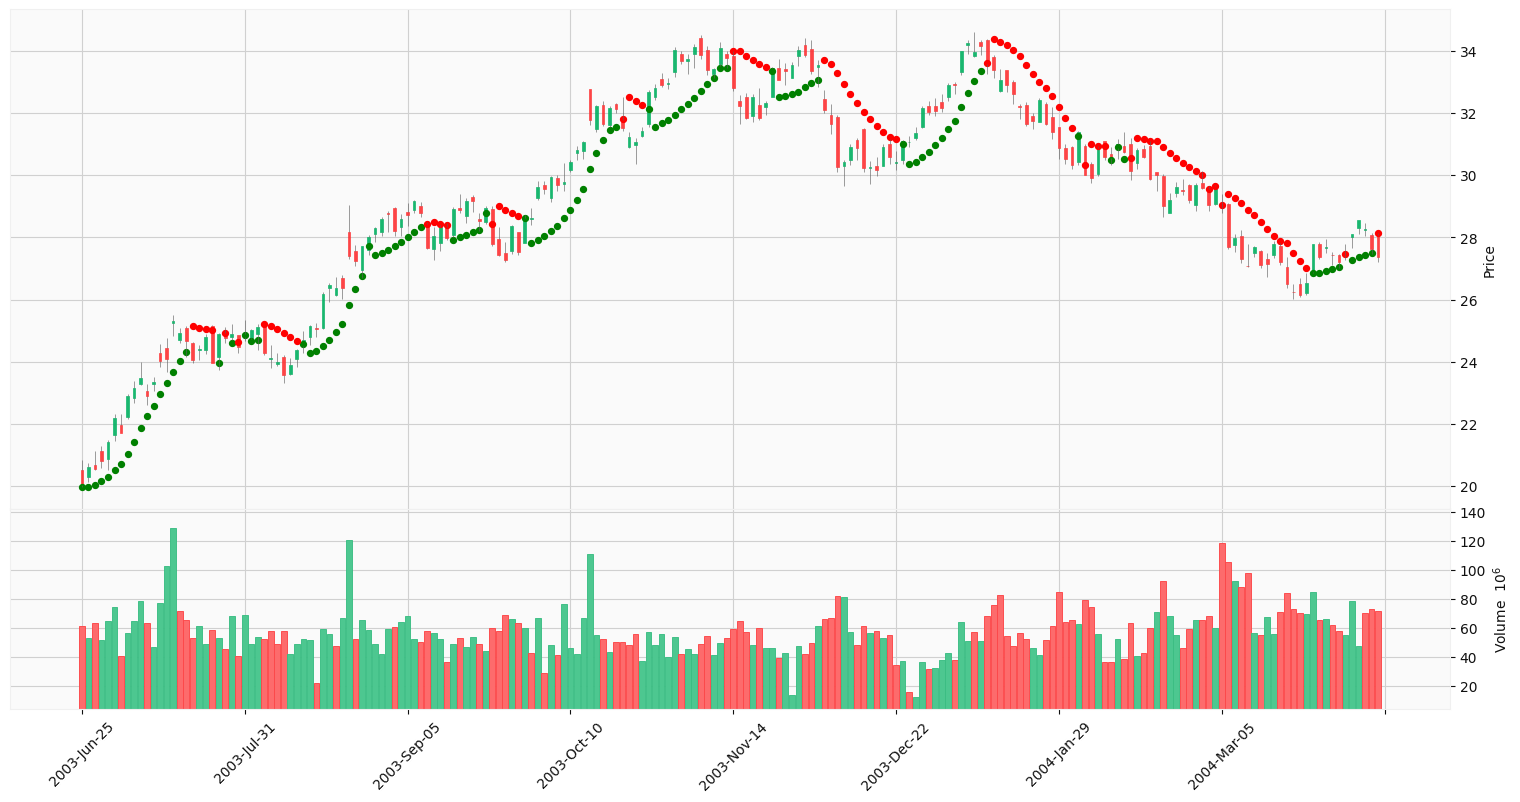

In [11]:
mpf.plot(
    df,
    volume=True,
    type="candle",
    style="yahoo",
    addplot=psar,
    figsize=(20,10),
)